# Redução de Dimensionalidade de PCA - Principal Component Analysis

In [1]:
# Importar Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Gerar um dataset sintético de alta dimensionalidade
np.random.seed(42)
dados = np.random.rand(1000, 10)
df = pd.DataFrame(dados, columns=[f"Var_{i}" for i in range(1,11)])

In [5]:
df

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854
...,...,...,...,...,...,...,...,...,...,...
995,0.512429,0.672714,0.387131,0.251308,0.166201,0.349474,0.741806,0.756705,0.666905,0.234028
996,0.588086,0.570690,0.484266,0.549979,0.491791,0.565456,0.715506,0.109628,0.749626,0.135886
997,0.066628,0.976080,0.956992,0.060437,0.443253,0.186245,0.485345,0.830177,0.950612,0.634253
998,0.353906,0.603326,0.312001,0.909824,0.870400,0.558232,0.324799,0.293390,0.033418,0.815821


In [3]:
# Padronizar os dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df)

In [6]:
dados_padronizados

array([[-0.36306636,  1.54747782,  0.82123438, ...,  1.30266173,
         0.33765991,  0.76189516],
       [-1.60351962,  1.61296192,  1.16740304, ...,  0.1215752 ,
        -0.25271377, -0.69087352],
       [ 0.46860684, -1.21993753, -0.69458455, ...,  0.08517606,
         0.30729689, -1.54396808],
       ...,
       [-1.44215811,  1.63400983,  1.59662716, ...,  1.17812933,
         1.55734246,  0.50462045],
       [-0.43538072,  0.36238819, -0.62615407, ..., -0.67880085,
        -1.64350335,  1.13741581],
       [-0.09727086, -0.58664432, -0.07782874, ...,  1.58124843,
        -0.37296276, -0.94908508]])

In [4]:
# Aplicar PCA
pca = PCA(n_components=3)
dados_pca = pca.fit_transform(dados_padronizados)

In [7]:
dados_pca

array([[ 0.9817551 , -1.17890195, -2.05070568],
       [-0.76457117, -0.840282  , -2.00850525],
       [ 0.69913652,  1.22103244,  0.24112552],
       ...,
       [-0.569385  , -2.86534946, -1.3758602 ],
       [-0.78502319,  0.94741564, -0.45746371],
       [ 0.96634823,  1.45302088, -0.20974619]])

In [8]:
# Criar um dataframe com os componentes principais
df_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2', 'PC3'])

In [9]:
df_pca

,PC1,PC2,PC3
0,0.981755,-1.178902,-2.050706
1,-0.764571,-0.840282,-2.008505
2,0.699137,1.221032,0.241126
3,-0.018722,1.659590,1.881796
4,0.364883,1.640074,-0.363675
...,...,...,...
995,0.392329,-0.803077,0.059480
996,-0.633879,0.652634,1.614461
997,-0.569385,-2.865349,-1.375860
998,-0.785023,0.947416,-0.457464


In [10]:
# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_
print("Variância Explicada pelos Componentes: ", variancia_explicada)

Variância Explicada pelos Componentes:  [0.11541114 0.11156582 0.10855758]


In [11]:
print("Variância Acumulada: ", np.cumsum(variancia_explicada))

Variância Acumulada:  [0.11541114 0.22697696 0.33553454]


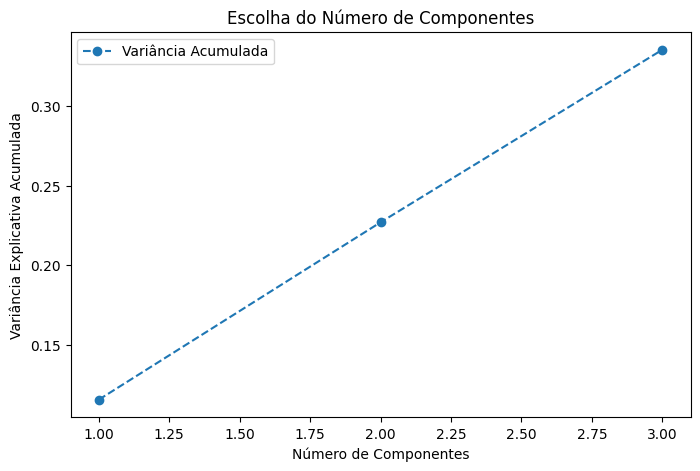

In [12]:
# Visualização da Variância Explicada
plt.figure(figsize=(8,5))
plt.plot(range(1,4), np.cumsum(variancia_explicada), marker='o', linestyle='--', label="Variância Acumulada")
plt.xlabel('Número de Componentes')
plt.ylabel("Variância Explicativa Acumulada")
plt.title("Escolha do Número de Componentes")
plt.legend()
plt.show()

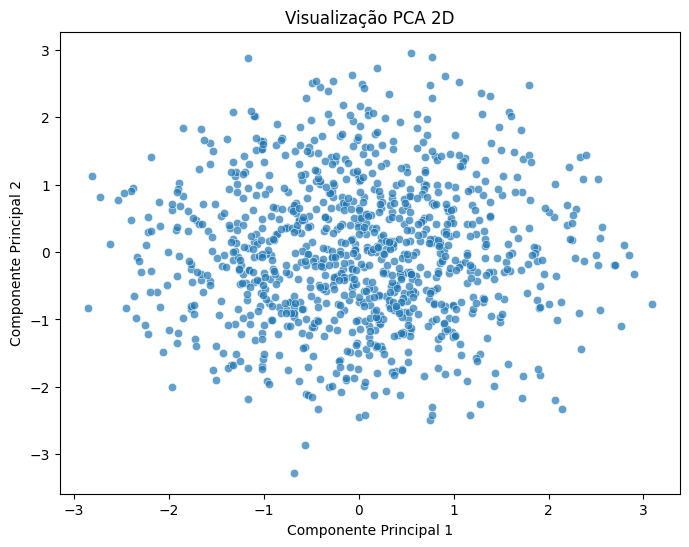

In [13]:
# Visualização 2D dos dados PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualização PCA 2D")
plt.show()

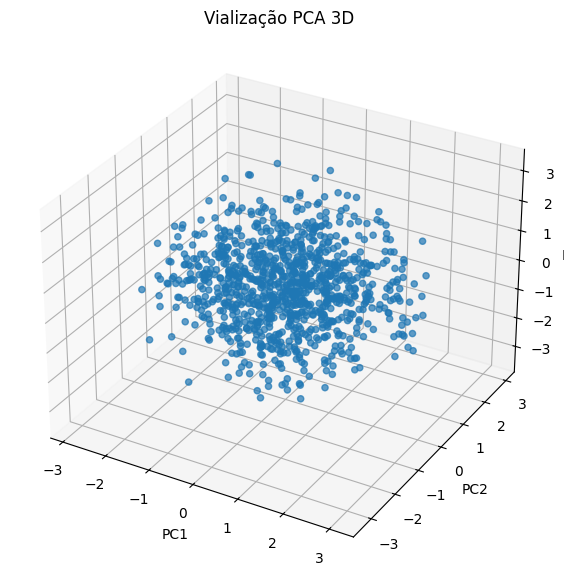

In [14]:
# Visualização 3D dos componentes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Vialização PCA 3D")
plt.show()